In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("train.csv")
df1.shape

(891, 12)

In [3]:
df2 = pd.read_csv("test.csv")
df2.shape

(418, 11)

In [4]:
df=df1.append(df2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
del df["Cabin"]

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,C


In [9]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

In [10]:
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.")
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Ms            2
Mlle          2
Lady          1
Dona          1
Sir           1
Capt          1
Mme           1
Countess      1
Jonkheer      1
Don           1
Name: Title, dtype: int64

In [12]:
df["Title"] = df["Title"].replace(["Ms", "Mlle",], "Miss")
df["Title"] = df["Title"].replace(["Mme", "Countess", "Lady", "Dona"], "Mrs")
df["Title"] = df["Title"].replace(["Dr", "Major", "Col", "Sir", "Rev", "Jonkheer", "Capt", "Don"], "Mr")

In [13]:
df["Fare"].fillna(df["Fare"].mean(), inplace = True)

In [14]:
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace = True)
df.groupby("Title")["Age"].transform("median")

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [15]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

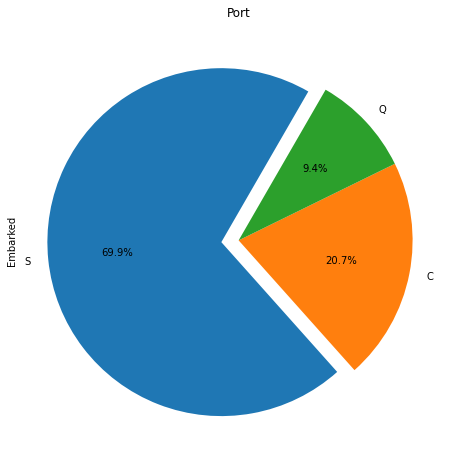

In [16]:
plt.figure(figsize=(8,8))
explode=(0.1,0,0)
df["Embarked"].value_counts().plot.pie(autopct="%1.1f%%", startangle=60, explode=explode)
plt.title("Port");

In [17]:
df["Embarked"] = df["Embarked"].fillna("S")

In [20]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [21]:
df_dummies=pd.get_dummies(df,drop_first=True)
df_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,0,1,0,1,0


In [22]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Age         1309 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   Fare        1309 non-null   float64
 6   Sex_male    1309 non-null   uint8  
 7   Embarked_Q  1309 non-null   uint8  
 8   Embarked_S  1309 non-null   uint8  
 9   Title_Miss  1309 non-null   uint8  
 10  Title_Mr    1309 non-null   uint8  
 11  Title_Mrs   1309 non-null   uint8  
dtypes: float64(3), int64(3), uint8(6)
memory usage: 111.5 KB


In [23]:
df_train=df_dummies[:891]
df_test=df_dummies[891:]

In [24]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,0,1,0,1,0


In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    0 non-null      float64
 1   Pclass      418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Sex_male    418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
 9   Title_Miss  418 non-null    uint8  
 10  Title_Mr    418 non-null    uint8  
 11  Title_Mrs   418 non-null    uint8  
dtypes: float64(3), int64(3), uint8(6)
memory usage: 25.3 KB


In [26]:
x_train = df_train.drop(columns=["Survived"])

In [27]:
y = df1["Survived"]

In [28]:
x_test = df_test.drop(columns=["Survived"])

In [40]:
model = Sequential()

model.add(Dense(88, activation="relu"))
tf.keras.layers.BatchNormalization()
model.add(Dense(64, activation="sigmoid"))
tf.keras.layers.BatchNormalization()
model.add(Dense(32, activation="relu"))
tf.keras.layers.BatchNormalization()
model.add(Dense(16, activation="relu"))
tf.keras.layers.BatchNormalization()
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train,y, epochs=1000, batch_size=11, verbose=1)

model.summary()

Epoch 1/1000
81/81 [==============================] - 4s 3ms/step - loss: 0.6489 - accuracy: 0.5859
Epoch 2/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.5983 - accuracy: 0.6782
Epoch 3/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.6836
Epoch 4/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.5557 - accuracy: 0.7265
Epoch 5/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7040
Epoch 6/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.5488 - accuracy: 0.7547
Epoch 7/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.7855
Epoch 8/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.7860
Epoch 9/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.7581
Epoch 10/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.5094 - accuracy: 0.7639

81/81 [==============================] - 0s 3ms/step - loss: 0.2997 - accuracy: 0.8842
Epoch 155/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.2957 - accuracy: 0.8849
Epoch 156/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.3358 - accuracy: 0.8612
Epoch 157/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8656
Epoch 158/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.8862
Epoch 159/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.8904
Epoch 160/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8620
Epoch 161/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8838
Epoch 162/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8464
Epoch 163/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.

81/81 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.8759
Epoch 312/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.2541 - accuracy: 0.9013
Epoch 313/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9116
Epoch 314/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9218
Epoch 315/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9164
Epoch 316/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.2160 - accuracy: 0.9153
Epoch 317/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.2449 - accuracy: 0.8975
Epoch 318/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.9113
Epoch 319/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.9067
Epoch 320/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.2399 - accuracy: 0.

81/81 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 0.9237
Epoch 469/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.9008
Epoch 470/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.2218 - accuracy: 0.9062
Epoch 471/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.1790 - accuracy: 0.9275
Epoch 472/1000
81/81 [==============================] - 0s 4ms/step - loss: 0.2144 - accuracy: 0.9016
Epoch 473/1000
81/81 [==============================] - 0s 4ms/step - loss: 0.2095 - accuracy: 0.9231
Epoch 474/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.2104 - accuracy: 0.9200
Epoch 475/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.9329
Epoch 476/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.1819 - accuracy: 0.9287
Epoch 477/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.2114 - accuracy: 0.

81/81 [==============================] - 0s 3ms/step - loss: 0.1859 - accuracy: 0.9300
Epoch 548/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9336
Epoch 549/1000
81/81 [==============================] - 0s 4ms/step - loss: 0.1529 - accuracy: 0.9439
Epoch 550/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9187
Epoch 551/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9248
Epoch 552/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9115
Epoch 553/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.1984 - accuracy: 0.9226
Epoch 554/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.1844 - accuracy: 0.9182
Epoch 555/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.1894 - accuracy: 0.9255
Epoch 556/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2209 - accuracy: 0.

81/81 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9362
Epoch 706/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9225
Epoch 707/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9116
Epoch 708/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.9224
Epoch 709/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.1905 - accuracy: 0.9257
Epoch 710/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.1890 - accuracy: 0.9283
Epoch 711/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9256
Epoch 712/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.1992 - accuracy: 0.9322
Epoch 713/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9131
Epoch 714/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.1520 - accuracy: 0.

81/81 [==============================] - 0s 3ms/step - loss: 0.1822 - accuracy: 0.9319
Epoch 863/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.1694 - accuracy: 0.9345
Epoch 864/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2332 - accuracy: 0.9157
Epoch 865/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9199
Epoch 866/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.9269
Epoch 867/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.1829 - accuracy: 0.9166
Epoch 868/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2153 - accuracy: 0.9163
Epoch 869/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9186
Epoch 870/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9234
Epoch 871/1000
81/81 [==============================] - 0s 3ms/step - loss: 0.1755 - accuracy: 0.

In [41]:
scores = model.evaluate(x_train,y) 

28/28 [==============================] - 1s 2ms/step - loss: 0.1629 - accuracy: 0.9349


In [42]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 93.49%


In [ ]:
model.predict_classes(X) #sonuç çıktılarını almak için